In [1]:
import treecorr

from random import *
import math
import numpy as np
import astropy.table
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_specgals

In [2]:
nn = treecorr.NNCorrelation(nbins = 16, min_sep = 1/60, max_sep = 6) # param. can be chosen to match astroML version

In [3]:
"""

I want to find nn.calculateXi(rr), but for that I would need rr, the "NNCorrelation function for random points".

Or... do I just need to use nn.process(catalog)?
    Also, is "Euclidean" a good enough approximation for the method? Or is "Arc" necessary?


Actually I think I need both.

"""

'\n\nI want to find nn.calculateXi(rr), but for that I would need rr, the "NNCorrelation function for random points".\n\nOr... do I just need to use nn.process(catalog)?\n    Also, is "Euclidean" a good enough approximation for the method? Or is "Arc" necessary?\n\n\nActually I think I need both.\n\n'

In [4]:
from astroML.datasets import fetch_sdss_specgals

# Get data and do some quality cuts
data = fetch_sdss_specgals()
m_max = 17.7
# redshift and magnitude cuts
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]
# RA/DEC cuts
RAmin, RAmax = 140, 220 
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax] 
data = data[data['ra'] > RAmin] 
data = data[data['dec'] < DECmax] 
data = data[data['dec'] > DECmin]
ur = data['modelMag_u'] - data['modelMag_r'] 
flag_red = (ur > 2.22)
flag_blue = ~flag_red
data_red = data[flag_red] 
data_blue = data[flag_blue]
print("data size:")
print(" red gals: ", len(data_red)) 
print(" blue gals:", len(data_blue))

data size:
 red gals:  38017
 blue gals: 16883


In [5]:
data['ra']

array([150.22379435, 151.11106345, 152.05986128, ..., 164.26128478,
       164.29429782, 164.34472246])

In [6]:
cat = treecorr.Catalog(ra = data['ra'], dec = data['dec'], ra_units='deg', dec_units='deg')

In [7]:
nn.process(cat)

In [8]:
len(data['ra'])

54900

In [9]:
rand_ra = []
rand_dec = []
for i in range(54900):
    u = random()
    v = random()
    rand_ra.append((2*math.pi*u) )
    rand_dec.append(math.acos(2*v -1))

In [10]:
rr = treecorr.NNCorrelation(nbins = 16, min_sep = 1/60, max_sep = 6)

In [11]:
catrand = treecorr.Catalog(ra = rand_ra, dec = rand_dec, ra_units='deg', dec_units='deg')

In [12]:
rr.process(catrand)

In [13]:
corr = nn.calculateXi(rr)

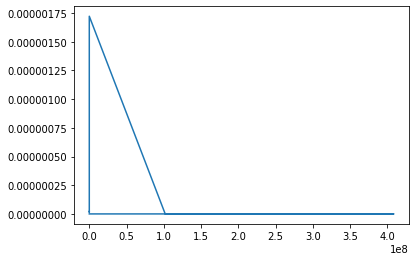

In [14]:
plt.plot(corr[0], corr[1])

In [15]:
corr

(array([-9.89885826e-01, -9.86489891e-01, -9.76657756e-01, -9.52151188e-01,
        -8.52020534e-01,  2.20920585e+01,  1.01891671e+08,  1.80293774e+08,
         2.98749027e+08,  4.08508787e+08,  3.19928375e+08,  8.64760700e+07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]),
 array([2.09714179e-08, 1.42984543e-08, 1.26226729e-08, 1.32766861e-08,
        2.11761016e-08, 1.72141928e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

In [16]:
bin_centers = nn.meanlogr

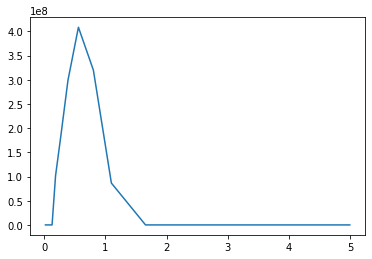

In [17]:
plt.plot( math.e**(bin_centers),corr[0])

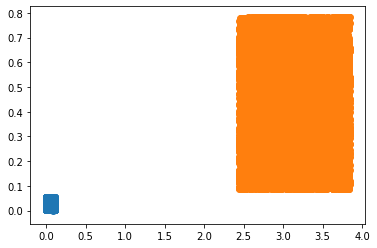

In [18]:
plt.scatter(catrand.ra, catrand.dec)
plt.scatter(cat.ra, cat.dec)

In [19]:
# All given in radians:
ra_range = max(cat.ra) - min(cat.ra)
dec_range = max(cat.dec) - min(cat.dec)
ra_min = min(cat.ra)
dec_min = min(cat.dec)

In [20]:
rand_ra = []
rand_dec = []
for i in range(54900):
    u = random()
    v = random()
    rand_ra.append((2*math.pi*u)*(ra_range/(2*math.pi)) + ra_min)
    rand_dec.append((math.acos(2*v -1))*(dec_range/(math.pi)) + dec_min)

In [21]:
nn = treecorr.NNCorrelation(nbins = 16, min_sep = 1/60, max_sep = 6)
cat = treecorr.Catalog(ra = data['ra'], dec = data['dec'], ra_units='deg', dec_units='deg')
nn.process(cat)

rr = treecorr.NNCorrelation(nbins = 16, min_sep = 1/60, max_sep = 6)
catrand = treecorr.Catalog(ra = rand_ra, dec = rand_dec, ra_units='rad', dec_units='rad')
rr.process(catrand)

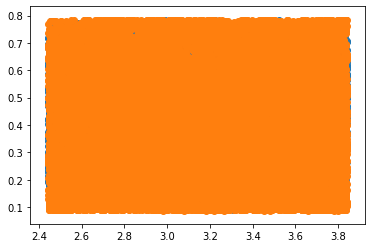

In [22]:
plt.scatter(catrand.ra, catrand.dec)
plt.scatter(cat.ra, cat.dec)

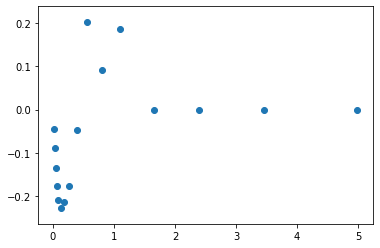

In [33]:
bin_centers = nn.meanlogr

corr = nn.calculateXi(rr)
plt.scatter( math.e**(bin_centers),corr[0])

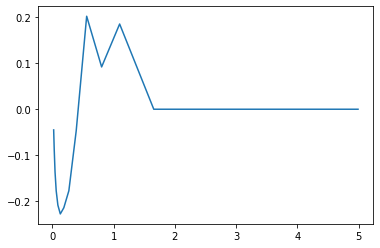

In [34]:
plt.plot( math.e**(bin_centers),corr[0])

In [38]:
dr = treecorr.NNCorrelation(nbins = 16, min_sep = 1/60, max_sep = 6)
dr.process(cat, catrand)

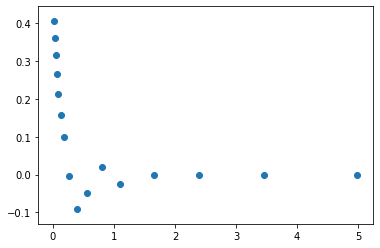

In [39]:
bin_centers = nn.meanlogr

corr = nn.calculateXi(rr, dr)
plt.scatter( math.e**(bin_centers),corr[0])

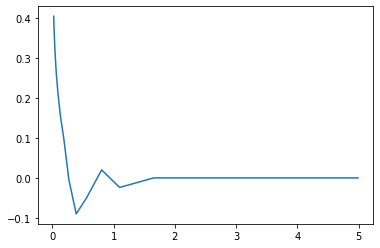

In [42]:
plt.plot( math.e**(bin_centers),corr[0])

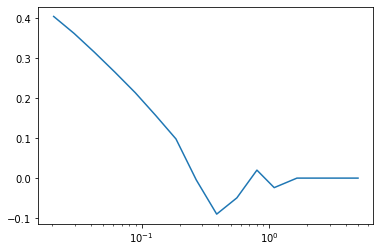

In [47]:
# Trying log scale
plt.semilogx(math.e**(bin_centers),corr[0])

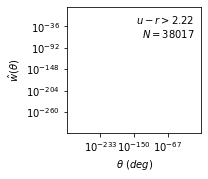

In [51]:
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)
for i in range(1):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    #ax.errorbar(bin_centers, corr[i], corr_err[i],
    #            fmt='.k', ecolor='gray', lw=1)

    #t = np.array([0.01, 10])
    #ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$')
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')